In [1]:
import pandas as pd
import numpy as np
import sympy


In [18]:
# Possible serial interval types available
from matplotlib.pyplot import sca


dist_names = ['exponential', 'gamma', 'delta', 'bimodal']


def gamma_dist(p, x, shape):
    """
    Gamma distribution, p is 1/mean, shape param preset
    """
    # mean = shape * scale
    scale = 1 / (p * shape)
    rate  = 1/ scale

    # Gamma (Erlang) probabilities
    pr   = -np.log(np.math.factorial(shape-1)) + shape*np.log(rate) + (shape-1)*np.log(x) - rate*x
    return np.exp(pr)


def delta_dist(p, xmax, n_win):
    """
    Delta distribution, 1/p is mean
    """

    pr = np.zeros(xmax)


    # Num time points either side of omega
    a = round(1/p) - (n_win - 1) / 2
    b = round(1/p) + (n_win - 1) / 2

    pr[a:b+1] =  1 / n_win

    return pr

In [32]:

gamma_priors = {}
gamma_priors["shape"] = 20
gamma_priors["scale"] = 20
gamma_priors["omega"] = 14.2


# Renewal model with R and serial interval densities

num_days = 365
si_dist  = lambda p: gamma_dist(p, np.arange(1, num_days), gamma_priors["shape"])



In [33]:

# Constant R
Rt = 1.8*np.ones((num_days))

# Daily incidence
inf = np.zeros(num_days)

# Infectiousness, Poisson rate
λ    = np.zeros(num_days)
rate = np.zeros(num_days)

# Initialise epidemic
inf[0] = 10

pop_size = 1e6
sus    = np.zeros(num_days)
sus[0] = pop_size - inf[0]


# Renewal model
for t in range(1, num_days):

    # Relevant part of serial distribution
    Pomegat = si_dist(1/gamma_priors["omega"])[:t]

    # Total infectiousness
    λ[t] =   np.dot(np.flip(inf[:t]), Pomegat)

    # Rate for ith day incidence
    rate[t] = λ[t]*Rt[t]

    # Renewal incidence
    inf[t] = np.random.poisson(sus[t-1]*rate[t])
    sus[t] = sus[t-1] - inf[t]


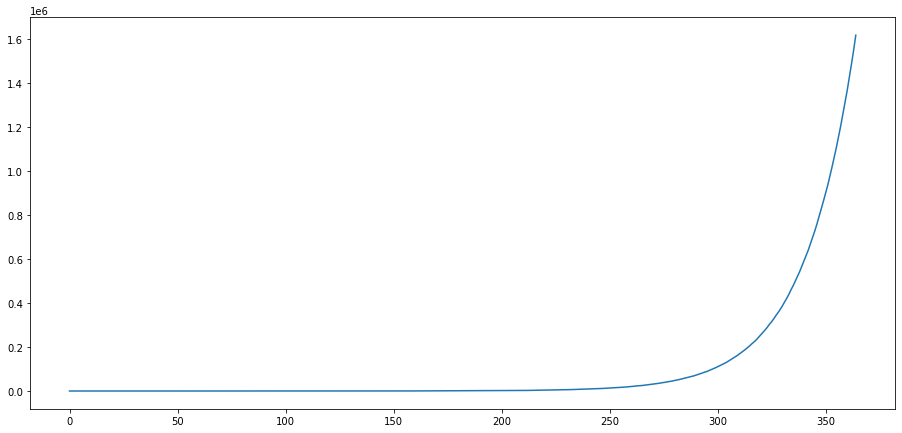

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))
ax.plot(inf)